<a href="https://colab.research.google.com/github/RheyMartt/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [28]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

df_cluster = df[['type', 'release_year', 'rating', 'listed_in']]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder_df = encoder.fit_transform(df_cluster[['type', 'rating', 'listed_in']])

X = np.hstack((df_cluster[['release_year']].values, encoder_df))


2. Create a scree plot for each principal component

Number of components to retain 90% variance: 1


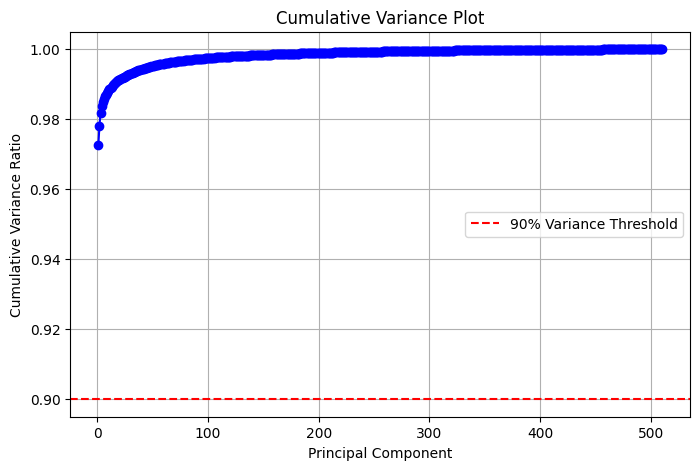

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of components to retain 90% variance: {num_components}")


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Plot')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

3. Use any clustering algorithm to create clusters

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_pca)

Shape of X_pca: (7787, 1)


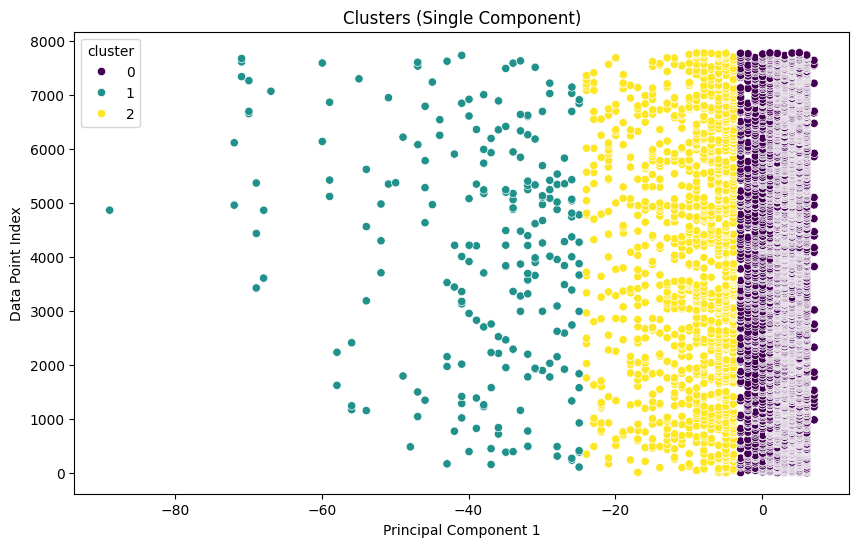

In [38]:
import seaborn as sns

print(f"Shape of X_pca: {X_pca.shape}")

if X_pca.shape[1] == 1:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=range(len(X_pca)), hue=df['cluster'], palette='viridis')
    plt.title('Clusters (Single Component)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Data Point Index')
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
    plt.title('Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

4. Profile each cluster that you have generated based on your experiments

In [37]:
for cluster in sorted(df['cluster'].unique()):
    print(f"\ncluster {cluster} Overview:")
    print(df[df['cluster'] == cluster][['type', 'release_year', 'rating', 'listed_in']].head(10))



cluster 0 Overview:
       type  release_year rating  \
0   TV Show          2020  TV-MA   
1     Movie          2016  TV-MA   
2     Movie          2011      R   
5   TV Show          2016  TV-MA   
6     Movie          2019  TV-MA   
8     Movie          2019  TV-14   
10    Movie          2017  TV-MA   
11  TV Show          2018  TV-MA   
12  TV Show          2019  TV-MA   
13    Movie          2018  TV-MA   

                                            listed_in  
0   International TV Shows, TV Dramas, TV Sci-Fi &...  
1                        Dramas, International Movies  
2                 Horror Movies, International Movies  
5     International TV Shows, TV Dramas, TV Mysteries  
6                 Horror Movies, International Movies  
8                 Horror Movies, International Movies  
10                                  Dramas, Thrillers  
11  Crime TV Shows, International TV Shows, TV Dramas  
12  Crime TV Shows, Docuseries, International TV S...  
13  Documentaries, Int